# Figure 7 Frequency Extension Occurrence Distribution
In this notebook we demonstrate how to plot the occurrence of low and high frequency extensions in polar plots

In [164]:
import vaex as vx
import matplotlib.pyplot as plt
from Plotting_Tools.polar_plot import polar
from Plotting_Tools.colormap_tools import truncate_colormap
import numpy as np
from functools import partial
from Wind_Waves.reading_tools import find_closest
import pandas as pd
import matplotlib.dates as mdates

plt.rcParams.update({
    'font.size':30,            # Default text size
    'axes.titlesize': 40,       # Axes title
    'axes.labelsize': 30,       # X and Y axis labels
    'xtick.labelsize': 40,      # X tick labels
    'ytick.labelsize': 25,      # Y tick labels
    'legend.fontsize': 18,      # Legend text
    'figure.titlesize': 40      # Figure title
})

## Figure Setup

xaxis not inverted
xaxis not inverted
xaxis not inverted


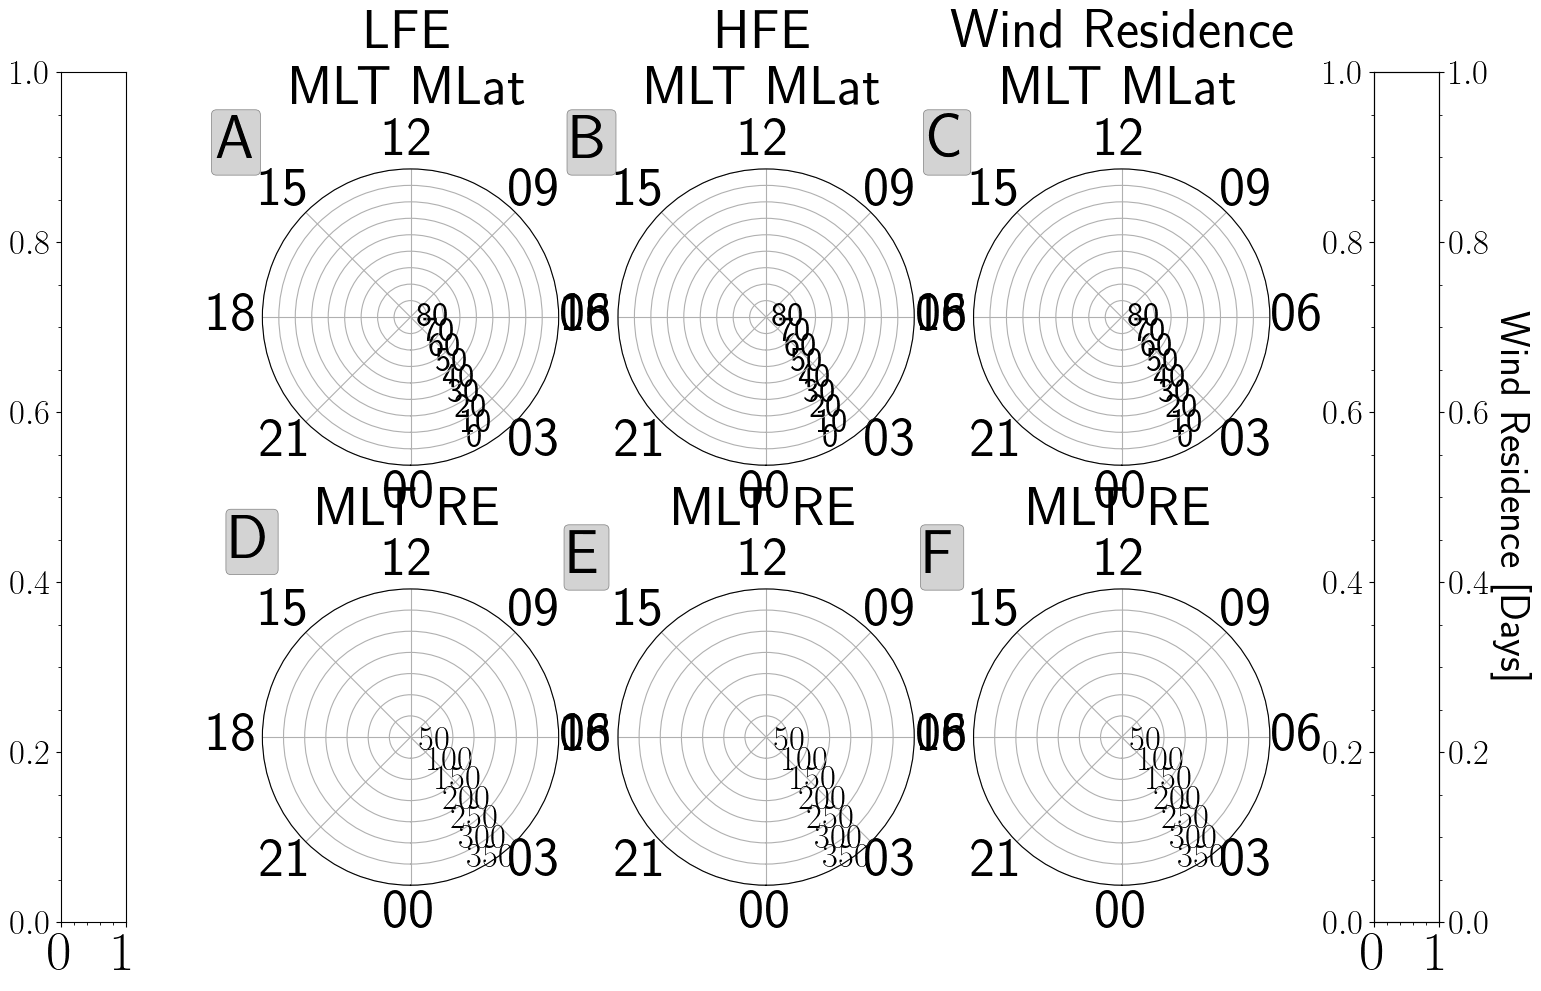

In [165]:
fig= plt.figure(figsize=(13, 10))


lfe_vlim= (0, 100)
wind_vlim = (0, .4)



cax2= fig.add_axes([.98, .1, .05, .85])
cax= fig.add_axes([-.03, .1, .05, .85])
ax_lfe = polar(fig.add_subplot(231, projection='polar'))

ax_lfe.text(-3*np.pi/4, 150, 'A', size=45,
    ha='center',  # center text horizontally
    va='center',  # center text vertically
    bbox=dict(
        facecolor='lightgray',
        edgecolor='gray',
        linewidth=0.5,
        alpha=1,
        boxstyle='round,pad=0.08'
    )
    )

ax_lfe.set_title('LFE\nMLT MLat')



ax_hfe= polar(fig.add_subplot(232, projection='polar'))

ax_hfe.text(-3*np.pi/4, 150, 'B', size=45,
    ha='center',  # center text horizontally
    va='center',  # center text vertically
    bbox=dict(
        facecolor='lightgray',
        edgecolor='gray',
        linewidth=0.5,
        alpha=1,
        boxstyle='round,pad=0.08'
    )
    )
ax_hfe.set_title('HFE\nMLT MLat')

ax_wind= polar(fig.add_subplot(233, projection='polar'))
ax_wind.text(-3*np.pi/4, 150, 'C', size=45,
    ha='center',  # center text horizontally
    va='center',  # center text vertically
    bbox=dict(
        facecolor='lightgray',
        edgecolor='gray',
        linewidth=0.5,
        alpha=1,
        boxstyle='round,pad=0.08'
    )
    )
ax_wind.set_title('Wind Residence\nMLT MLat')
ax_wind.ax.tick_params(axis='x', labelcolor='black')

ax_lfe2= fig.add_subplot(234, projection='polar')
ax_lfe2.text(-3*np.pi/4, 600, 'D', size=45,
        bbox=dict(
        facecolor='lightgray',
        edgecolor='gray',
        linewidth=0.5,
        alpha=1,
        boxstyle='round,pad=0.08'
    )
)
ax_hfe2= fig.add_subplot(235, projection='polar')
ax_hfe2.text(
    -3 * np.pi / 4, 600, 'E',
    size=45,
    ha='center',  # center text horizontally
    va='center',  # center text vertically
    bbox=dict(
        facecolor='lightgray',
        edgecolor='gray',
        linewidth=0.5,
        alpha=1,
        boxstyle='round,pad=0.08'
    )
)
ax_wind2= fig.add_subplot(236, projection='polar')
ax_wind2.text(
    -3 * np.pi / 4, 600, 'F',
    size=45,
    ha='center',  # center text horizontally
    va='center',  # center text vertically
    bbox=dict(
        facecolor='lightgray',
        edgecolor='gray',
        linewidth=0.5,
        alpha=1,
        boxstyle='round,pad=0.08'
    )
)
def conv(mlt):
    mlt=np.array(mlt)
    theta=mlt*np.pi/12
    x= -np.sin(theta-np.pi/2)
    y= np.sin(theta)
    θ = np.arctan2(y, x)
    return θ



for ax_ in (ax_lfe, ax_hfe, ax_wind):
    labels=ax_.set_latticks(np.arange(0, 81, 10), color='black')
    ax_.ax.tick_params(axis='y', labelcolor='black')
    ax_.ax.tick_params(axis='x', labelcolor='black')
    ax_.set_rmin(0)
for ax_ in (ax_lfe2, ax_hfe2, ax_wind2):
    ax_.set_theta_zero_location('S')
    ax_.set_xticks(np.deg2rad(np.arange(0, 360, 45)))
    ax_.set_xticklabels([f'{x:02d}' for x in range(0, 24, 3)])
    ax_.set_yticks(np.arange(50, 400, 50))
    ax_.xaxis.set_tick_params(pad=10)
    ax_.tick_params(axis='y', labelcolor='black')
    ax_.tick_params(axis='x', labelcolor='black')
    ax_.set_title('MLT RE')
cax.yaxis.set_label_position('right')
cax2.yaxis.set_label_position('left')
cax4= cax2.twinx()
cax4.set_ylabel('Wind Residence [Days]', rotation=270, labelpad=30)



for ca in (cax, cax2, cax4):
    ca.minorticks_on()

## Load Data

In [166]:
akr_flims= pd.read_csv('../Example_Data/Full_Run_Through/Frequency_Extension.csv',
                      parse_dates=['Date_UTC', 'combined_closest'])
wind_position= pd.read_csv('../Example_Data/Full_Run_Through/WIND_Position_Mag.csv',
                          parse_dates=['Date_UTC'])
wind_position.sort_values('Date_UTC', inplace=True)

def interps(x, *args):
    from scipy.interpolate import interp1d
    return [interp1d(x, arg, fill_value="extrapolate") for arg in args]
position_funcs= interps(mdates.date2num(wind_position['Date_UTC'].values),
                            wind_position.R.values,
                            wind_position.mlt.values,
                            wind_position.mlat.values)

for col, func in zip(['R', 'MLT', 'MLAT'], position_funcs):
    akr_flims[col]= func(mdates.date2num((akr_flims['Date_UTC'].values)))
akr_flims['MLAT']= np.abs(akr_flims['MLAT'])

flims_lfe= vx.from_pandas(akr_flims)
flims_hfe= vx.from_pandas(akr_flims)
available= vx.from_pandas(akr_flims)



In [167]:
flims_lfe.select(((flims_lfe.combined_fmin-flims_lfe.fmin)>0)&(flims_lfe['combined']>=-60)&(flims_lfe['combined']<=60*3))
flims_hfe.select(((flims_hfe.fmax-flims_hfe.combined_fmax)>0)&(flims_hfe['combined']>=-60)&(flims_hfe['combined']<=60*3))
available.select((available['combined']>=-60)&(available['combined']<=60*3))

n_mlt= 24
n_mlat= 20
n_r= 20
mlt_edges= available.bin_edges(akr_flims.MLT, shape=n_mlt, limits=[0, 24])
mlat_edges= available.bin_edges(akr_flims.MLAT, shape=n_mlat, limits=[0, 90])
r_edges= available.bin_edges(akr_flims.R, shape=n_r, limits=[0, 350])

theta_edges= conv(mlt_edges)


LFE_dist= flims_lfe.count(flims_lfe.fmin, binby=[flims_lfe.MLT, flims_lfe.MLAT], shape=(n_mlt, n_mlat), limits=([0, 24], [0, 90]),
                        array_type='xarray', selection=True)
HFE_dist= flims_hfe.count(flims_hfe.combined_fmax, binby=[flims_hfe.MLT, flims_hfe.MLAT], shape=(n_mlt, n_mlat),
                          limits=([0, 24], [0, 90]), array_type='xarray', selection=True)
wind_dist= available.count(available.SWEEP, binby=[available.MLT, available.MLAT], shape=(n_mlt, n_mlat),
                            limits=([0, 24], [0, 90]), array_type='xarray', selection=True)


## Formatting Two y Scale Colourbar

In [168]:
total_wind_sweeps= wind_dist.sum()

def percent2days(x):
    """ Calculates the number of days of data from percentage value"""
    return ((183*total_wind_sweeps)*(x/100)).astype(float)/(60*60*24)
def tick_fmt(x, pos):
    return f'{percent2days(x):.2f}'

def match_ycbar(event, cax, cax2, *args):
    y= np.array([percent2days(x) for x in cax.get_ylim()])
    cax2.set_ylim(y.min(), y.max())

on_ylim= partial(match_ycbar, cax=cax2, cax2=cax4)
cax2.callbacks.connect('ylim_changed', on_ylim)

0

In [169]:
pc= ax_lfe.pcolormesh(mlt_edges, mlat_edges, (LFE_dist.where(LFE_dist>0)/wind_dist).T*100, zorder=-1,
                    vmin=lfe_vlim[0], vmax=lfe_vlim[-1], edgecolor='black', linewidth=0.003)
pc.cmap.set_bad(alpha=0) # No AKR LFEs is White

ax_hfe.pcolormesh(mlt_edges, mlat_edges, (HFE_dist.where(HFE_dist>0)/wind_dist).T*100, zorder=-1,
                    vmin=lfe_vlim[0], vmax=lfe_vlim[-1], edgecolor='black', linewidth=0.003, cmap=pc.cmap)

cbar= fig.colorbar(pc, cax=cax)
cbar.set_label('AKR LFE/HFE Occurrence [\%]', rotation=270, labelpad=30)

ax_lfe.pcolormesh(mlt_edges, mlat_edges, (wind_dist.where(wind_dist>0).T)*100,
                zorder=-10, cmap=truncate_colormap('binary', 0, 1e-10), edgecolor='black', linewidth=0.003).cmap.set_bad('grey') # No Wind Data is Grey

ax_hfe.pcolormesh(mlt_edges, mlat_edges, (wind_dist.where(wind_dist>0).T)*100,
                zorder=-10, cmap=truncate_colormap('binary', 0, 1e-10), edgecolor='black', linewidth=0.003).cmap.set_bad('grey') # No Wind Data is Grey


pc2= ax_wind.pcolormesh(mlt_edges, mlat_edges,
                    (wind_dist.where(wind_dist>0).T/wind_dist.sum())*100,
                    vmin= wind_vlim[0], vmax=wind_vlim[-1], edgecolor='black', linewidth=0.003)
pc2.cmap.set_bad('grey') # No Wind Data is Grey
cax.tick_params(axis='y', labelcolor='black')

## MLT and Radial

In [170]:
LFE_dist= flims_lfe.count(flims_lfe.fmin, binby=[flims_lfe.MLT, flims_lfe.R], shape=(n_mlt, n_r), limits=([0, 24], [0, 350]),
                        array_type='xarray', selection=True)
HFE_dist= flims_hfe.count(flims_hfe.fmin, binby=[flims_hfe.MLT, flims_hfe.R], shape=(n_mlt, n_r), limits=([0, 24], [0, 350]),
                        array_type='xarray', selection=True)
wind_dist= available.count(available.SWEEP, binby=[available.MLT, available.R], shape=(n_mlt, n_r),
                            limits=([0, 24], [0, 350]), array_type='xarray', selection=True)

In [171]:
pc3= ax_lfe2.pcolormesh(theta_edges, r_edges, (LFE_dist.where(LFE_dist>0)/wind_dist).T*100, zorder=-1,
                    vmin= lfe_vlim[0], vmax= lfe_vlim[-1], edgecolor='black', linewidth=0.003)
pc3.cmap.set_bad(alpha=0) # No AKR LFEs is White
ax_hfe2.pcolormesh(theta_edges, r_edges, (HFE_dist.where(HFE_dist>0)/wind_dist).T*100, zorder=-1,
                    vmin= lfe_vlim[0], vmax= lfe_vlim[-1], edgecolor='black', linewidth=0.003, cmap=pc3.cmap)

ax_lfe2.pcolormesh(theta_edges, r_edges, (wind_dist.where(wind_dist>0).T)*100,
                zorder=-10, cmap=truncate_colormap('binary', 0, 1e-10), edgecolor='black', linewidth=0.003).cmap.set_bad('grey') # No Wind Data is Grey
ax_hfe2.pcolormesh(theta_edges, r_edges, (wind_dist.where(wind_dist>0).T)*100,
                zorder=-10, cmap=truncate_colormap('binary', 0, 1e-10), edgecolor='black', linewidth=0.003).cmap.set_bad('grey') # No Wind Data is Grey

pc4= ax_wind2.pcolormesh(theta_edges, r_edges, (wind_dist.where(wind_dist>0).T/wind_dist.sum())*100,
                    vmin= wind_vlim[0], vmax= wind_vlim[-1], edgecolor='black', linewidth=0.003)
pc4.cmap.set_bad('grey')
cbar2= fig.colorbar(pc4, cax=cax2)
cax2.set_ylabel('Wind Residence [\%]')
cax2.yaxis.set_label_position('left')
cax2.tick_params(axis='y', left=True, right=False, labelleft=True, labelright=False, which='both')
cax2.tick_params(axis='y', labelcolor='black')
cax4.tick_params(axis='y', labelcolor='black')


/home/simon/anaconda3/envs/vscode/lib/python3.10/site-packages/matplotlib/ticker.py:2920: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/simon/anaconda3/envs/vscode/lib/python3.10/site-packages/matplotlib/ticker.py:2920: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/simon/anaconda3/envs/vscode/lib/python3.10/site-packages/matplotlib/ticker.py:2920: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/simon/anaconda3/envs/vscode/lib/python3.10/site-packages/matplotlib/ticker.py:2920: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


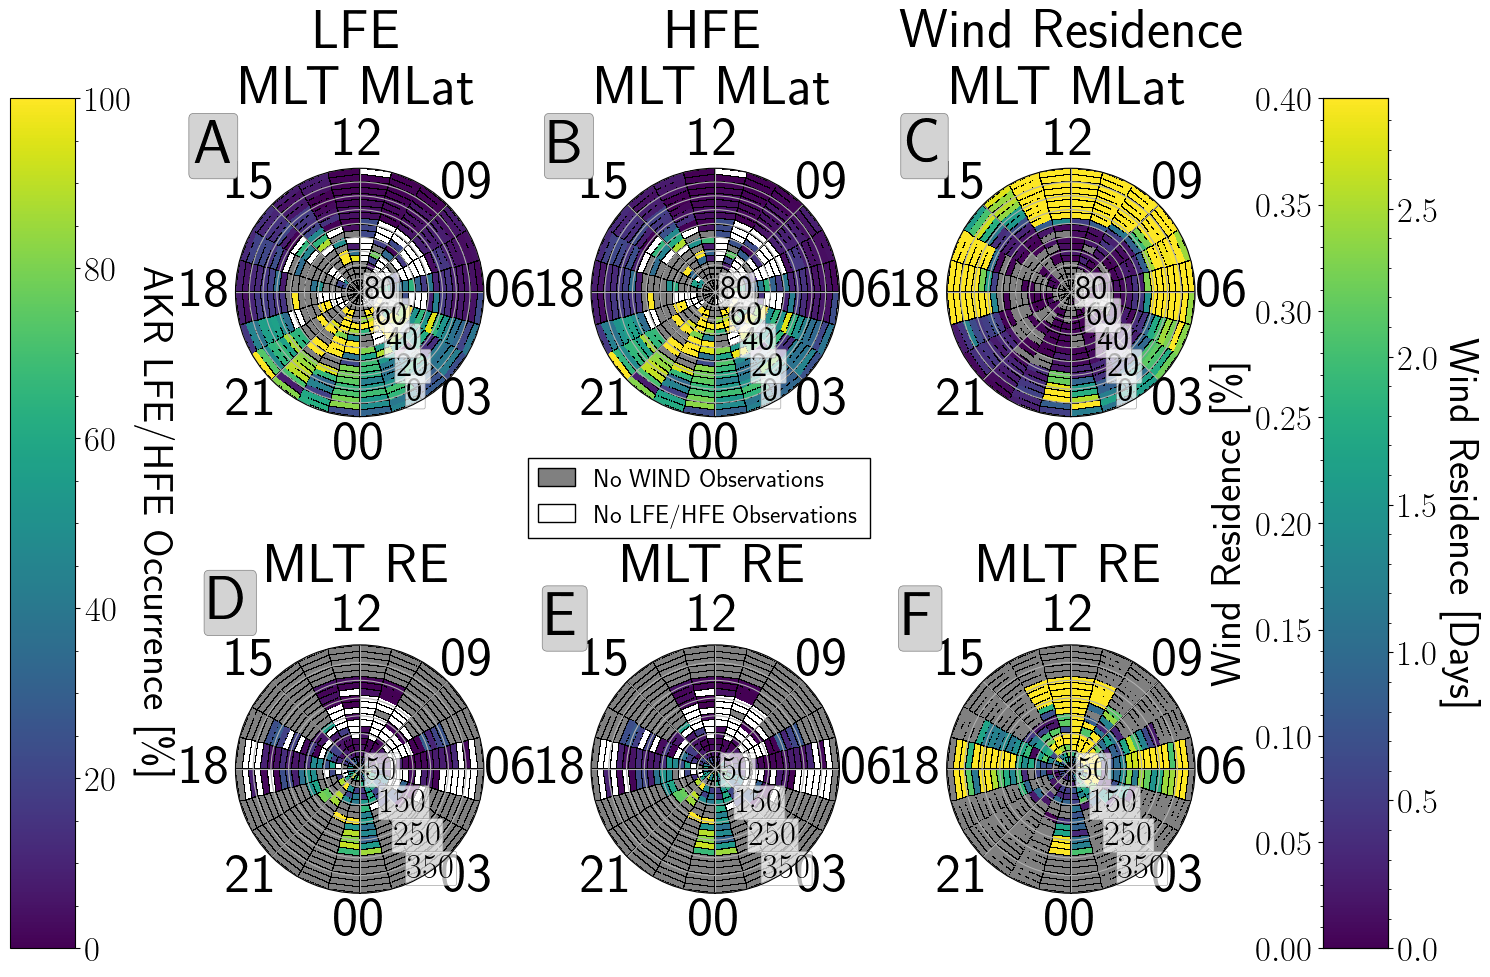

In [172]:
def style_tick_labels(event):
    # Update both x and y tick labels every draw
    for ax_ in [ax_lfe, ax_hfe, ax_wind, ax_lfe2, ax_hfe2, ax_wind2]:
        for label in ax_.get_yticklabels():
            label.set_bbox(dict(
                facecolor='white',
                edgecolor='gray',
                linewidth=0.5,
                alpha=0.7,
                boxstyle='round,pad=0.05'
            ))

# Connect to the draw event
fig.canvas.mpl_connect('draw_event', style_tick_labels)
for ca in (cax, cax2, cax4, ax_lfe.ax, ax_hfe.ax, ax_wind.ax, ax_lfe2, ax_hfe2, ax_wind2):
    ca.minorticks_on()
for ax_ in (ax_lfe.ax, ax_hfe.ax, ax_wind.ax, ax_lfe2, ax_hfe2, ax_wind2):
    labels = [label.get_text() if i % 2 == 0 else '' for i, label in enumerate(ax_.get_yticklabels())]
    ax_.set_yticklabels(labels)
fig.subplots_adjust(hspace=1.1)
# fig.suptitle('LFE Distribution', size=50, y=1.1)
for ax_ in (ax_lfe2, ax_hfe2, ax_wind2):
    pos = ax_.get_position()
    ax_.set_position([pos.x0, pos.y0+.045, pos.width, pos.height])
from matplotlib.patches import Patch


# Custom legend entries
legend_elements = [
    Patch(facecolor='grey', edgecolor='black', label='No WIND Observations'),
    Patch(facecolor='white', edgecolor='black', label='No LFE/HFE Observations')
]

# Add the legend at the center of the figure
fig.legend(handles=legend_elements,
           loc='center',
           bbox_to_anchor=(0.5, 0.55),
           frameon=True,
           fancybox=False,
           edgecolor='black',
           framealpha=1,
           ncol=1,
           handlelength=1.5)


fig